# Example: Fit Catalogue with Stardust

In [2]:
import stardust
import numpy as np

Imported filters from filters/filters.txt


Load in the class by proving the path to the .config file.

In [3]:
self = stardust.main.ctf(config_file='example.config')

READ CONFIG FILE example.config
Read a catalogue with 300 objects
Read band file: stellar+ir/example.bands
Read param file: stellar+ir/example.param
Using Legacy Format
Detected the following parameters ['ID', 'z', 'Mstar']
Input Bands: ok
Input Filters: ok
Data Loaded Successfully
Objects to Fit: 300


/Users/takafumi/miniconda3/envs/py39/lib/python3.9/site-packages/stardust/main.py:409: RuntimeWarning: invalid value encountered in divide
  sn = self.fnu[i]/self.efnu[i]


We can double check what parameters are in the config file

In [4]:
self.config

{'CATALOGUE': 'stellar+ir/c2015_sdc2_example.fits',
 'BANDS_FILE': 'stellar+ir/example.bands',
 'EXTRA_BANDS_FILE': 'None',
 'PARAM_FILE': 'stellar+ir/example.param',
 'PATH': 'test/output/',
 'OUTPUT_NAME': 'test',
 'SAVE_FIGURE': 0.0,
 'SAVE_TABLE': 0.0,
 'SAVE_SED': 0.0,
 'SAVE_COVAR': 0.0,
 'VERBOSE': 1.0,
 'FLUX_UNIT': 'mJy',
 'EXTRA_BANDS': 0.0,
 'AGN_EXTRA_BANDS': 0.0,
 'USE_COLD_DL': 1.0,
 'RADIO_METHOD': 'delv20',
 'UNCERT_SCALE': 0.05,
 'QSO': 0.0,
 'IGM_SWITCH': 0.0,
 'USE_OWN_STELLAR_MASS': 'False',
 'ABZP': 23.9,
 'FIT_DUST': 1.0,
 'FIT_AGN': 1.0,
 'FIT_STELLAR': 1.0}

These can also be changed manually after loading the module e.g.

In [5]:
self.config['OUTPUT_NAME'] = 'example_name'

Fit a single object from the catalogue and show its SED

(<Figure size 1000x500 with 1 Axes>,
 {'lambda': array([3.87860211e-02, 4.00646811e-02, 4.09171211e-02, ...,
         1.14531979e+06, 1.24245395e+06, 1.34782602e+06]),
  'templ_optical': array([1.11291795e-47, 1.20039935e-43, 3.52332892e-41, ...,
         2.48621282e-09, 2.26362765e-09, 2.06141711e-09]),
  'templ_agn': array([0., 0., 0., ..., 0., 0., 0.]),
  'templ_ir': array([2.70798194e-52, 5.77603070e-52, 9.44429405e-52, ...,
         5.38044061e-09, 4.24262812e-09, 3.34543110e-09]),
  'pivot': array([2.15030000e+00, 1.02170000e+00, 1.64330000e+00, 1.25270000e+00,
         4.44800000e-01, 5.47020000e-01, 7.67120000e-01, 6.27550000e-01,
         3.83790000e-01, 9.02820000e-01, 4.84730000e-01, 5.25930000e-01,
         6.23080000e-01, 6.78160000e-01, 7.35950000e-01, 4.26000000e-01,
         4.63330000e-01, 5.06080000e-01, 5.76290000e-01, 7.07350000e-01,
         8.24680000e-01, 7.12020000e-01, 8.15090000e-01, 3.55690000e+00,
         4.50200000e+00, 5.74500000e+00, 7.91580000e+00, 2.37

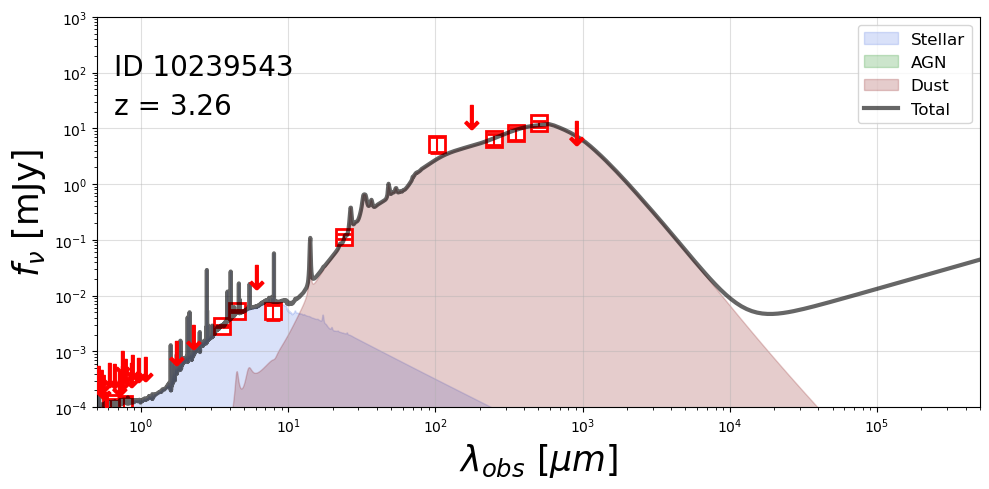

In [8]:
idx = 0
self.fit_object(idx)
self.show_fit(idx,radio=True)

We can also fit the entire catalogue

In [13]:
n_obj = 30 #Number of objects to fit, leave blank to fit everything
n_proc = -1 #Number of threads to use, -1 for all available threads, 1 for serial mode
self.fit_catalogue(n_proc=n_proc,n_obj=n_obj)

Begin Multithreading
10 threads utilised


100%|██████████| 30/30 [00:17<00:00,  1.69it/s]
/Users/takafumi/miniconda3/envs/py39/lib/python3.9/site-packages/stardust/main.py:1557: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mp_out=np.array(mp_out)


Finished Fitting, Preparing Output..
Time Elapsed: 24.94939374923706 s


Access outputs for each object

Mstar: 8.34 +- 0.19


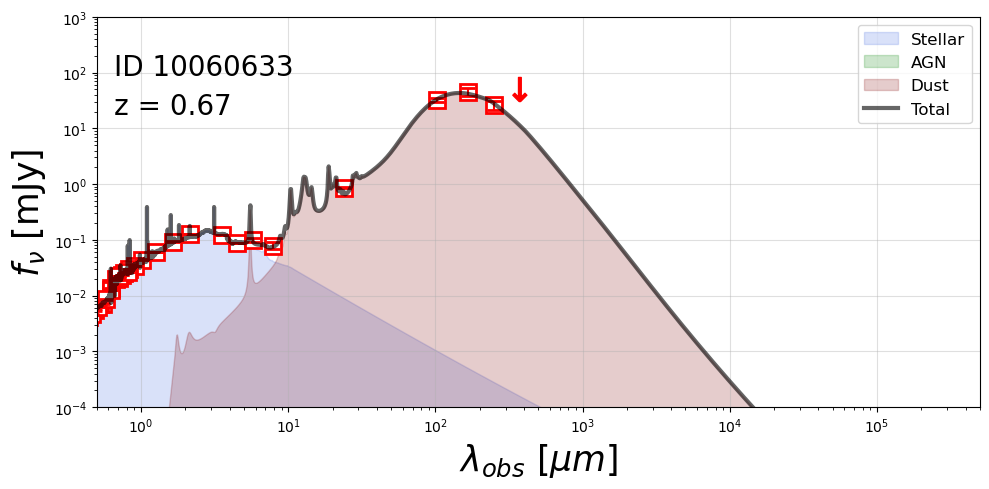

In [14]:
idx = 10
self.show_fit(idx)

#All the physical parameters like mstar, mdust and lir are contained within the self class
#These can be accessed like so
dust_mass = np.log10(self.mdust[idx])
e_dust_mass = self.e_mdust[idx]/self.mdust[idx]*np.log(10)**-1

print(r'Mstar: {:.2f} +- {:.2f}'.format(dust_mass,e_dust_mass))




Alternatively, we can just look at the output table

In [15]:
self.tab

id,ra,dec,z,mstar_input,lir,e_lir,lir_agn,e_lir_agn,lir_tot,e_lir_tot,sfr,e_sfr,f_agn,e_f_agn,mdust,e_mdust,mgas,e_mgas,delta_gdr,mstar,e_mstar,av,e_av,sfr_opt,e_sfr_opt,avu,e_avu,umin,qpah_idx,gamma,chi2,nfilt,lastdet
int64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64
10239543,149.62405,2.51671,3.262200117111206,10471296517.666538,5405858332401.276,2357775907969.002,0.0,0.0,5405858332401.276,2357775907969.002,540.5858332401276,235.7775907969002,0.0,0.0,8145273978.700499,4680788484.664468,1846958037820.722,1061378651927.0624,226.75210712990486,133103219671.45192,33776493551.097336,2.0772020623159433,3.4891518062337324e-10,60.80819802261854,28.113889662623674,5.309442846526549,0.5261485915517037,1.2,1.0,0,10.593182384983873,32,2164.5327562742236
10126383,150.3174,2.28307,0.12460000067949295,8912505.467113454,4560996836.003298,1582516365.6788034,8452855.551897567,8497289.761312528,4569449691.555196,1585792629.5632432,0.4560996836003298,0.15825163656788035,0.0018498629205874171,0.0030823816899585273,27124056.365469903,28746329.916343227,1.781690156093923e+56,1.8882519762412266e+56,6.568671485147375e+48,3144623735.2652435,304220218.330256,0.38408076190678964,6.882786493860212e-11,1.5043479233206924,0.16540493252294408,1.345225588547189,0.5261485915517037,1.2,4.0,0,23.46307498834166,31,281.6324535701647
10253058,149.83897,2.67504,0.24740000069141388,138038535583.8289,145083979672.34445,602392960.2055988,7077421287.542082,3701737507.1909947,152161400959.88654,4140431366.739092,14.508397967234446,0.060239296020559885,0.046512592831659476,0.1035555467370134,309799581.8521327,122581538.6007064,23646385077.33088,9356404704.598696,76.32800837225564,287834101966.759,634138052.3304138,0.84506345873681,3.1499517568491424e-13,8.53148270661871,0.029845319223213096,3.7465248675924427,0.5261485915517037,3.0,5.0,0,154.69224090870327,33,633.4846059511304
10108428,150.00479,2.05551,0.6700000166893005,23442281975.923817,288949262792.07544,3002631224.5475025,0.0,1532719777.3034964,288949262792.07544,5434165874.459898,28.894926279207546,0.3002631224547503,0.0,0.05185831801852028,601752704.5585358,296063953.92376256,69126869276.86928,34010606160.042854,114.87587634123368,162732980503.74274,2228117259.052475,0.8374475026529995,1.7650835844818936e-11,5.592380526551311,1.275725240600238,3.8414353351888293,0.5261485915517037,3.0,3.0,0,22.99707069946915,33,586.7845658640862
10041645,149.87355,1.60635,2.572499990463257,45708802901.85209,2040576222357.6934,809251345367.577,0.0,23943085393.131184,2040576222357.6934,808446468579.5725,204.05762223576934,80.92513453675771,0.0,0.08260934022138777,3551833014.0680776,4714086320.7398615,401509813488.5137,532894399008.1222,113.04298707124354,128407193489.73674,11985601294.825073,1.1262186943458141,2.1638387660722452e-10,14.154250864300272,11.408635806329777,4.596108464053106,0.5261485915517037,4.0,2.0,0,7.194753592069906,30,1814.2726851568225
10227270,150.23978,2.71752,0.7372999787330627,32359382746.997105,210290417098.35114,59912653379.72,0.0,3151190790.0753,210290417098.35114,60537271308.65193,21.029041709835113,5.991265337972,0.0,0.11513526368617318,189070050.69557798,498201934.7253196,18736901445.701984,49371968308.3826,99.10031428441464,47494618436.85188,5149291926.609596,1.865936313558851,6.759510495059205e-11,27.017507018934477,2.252480032252759,8.897883776926262,0.5261485915517037,7.0,3.0,0,32.78088139086863,33,610.4316189274788
10120472,150.07666,2.20598,1.05649995803833,70794640622.02759,403860089234.9617,16296269726.424421,8204076006.725439,12445364493.230421,412064165241.68713,26256291140.15907,40.38600892349617,1.6296269726424422,0.01990970508661805,0.27351039051285875,251319870.76668793,337097448.0512782,21539827942.353504,28891551665.533554,85.70682404317301,104005148441.11623,7236745997.212

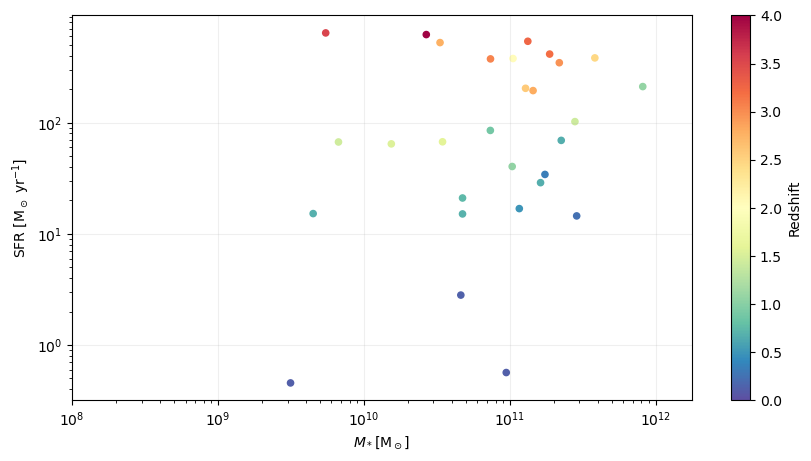

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))

plt.scatter(self.tab['mstar'],self.tab['sfr'],c=self.tab['z'],s=20,vmin=0,vmax=4,cmap='Spectral_r')
plt.colorbar(label='Redshift')
plt.loglog()
plt.xlim(1e8,)
plt.ylabel(r'SFR [M$_\odot$ yr$^{-1}$]')
plt.xlabel(r'$M_*$[M$_\odot$]')
plt.grid(alpha=.2)

In [17]:
self.set_ztemps()

Z_MIN, Z_MAX or Z_STEP parameters are not defined in config.
Using default values (0.01,12,0.005)
Redshift Templates Ready. Time Elapsed:24.23359489440918s
